In [1]:
import numpy as np
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')

# defining dir variables 
train_defective = 'G:/Mtech - Sem 2/Deep Learning/Project/casting_data/train/def_front/'
train_ok = 'G:/Mtech - Sem 2/Deep Learning/Project/casting_data/train/ok_front/'

test_defective = 'G:/Mtech - Sem 2/Deep Learning/Project/casting_data/test/def_front/'
test_ok = 'G:/Mtech - Sem 2/Deep Learning/Project/casting_data/test/ok_front/'

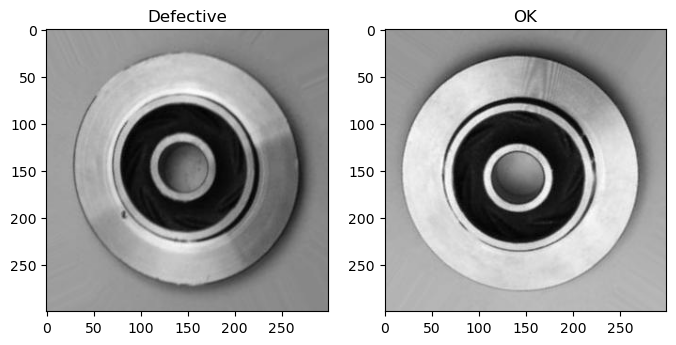

In [2]:
# Ploting images
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(8,4))
axes[0].imshow(plt.imread(train_defective+os.listdir(train_defective)[0]))
axes[1].imshow(plt.imread(train_ok+os.listdir(train_ok)[0]))
axes[0].set_title('Defective')
axes[1].set_title('OK')
plt.show()

### EDA

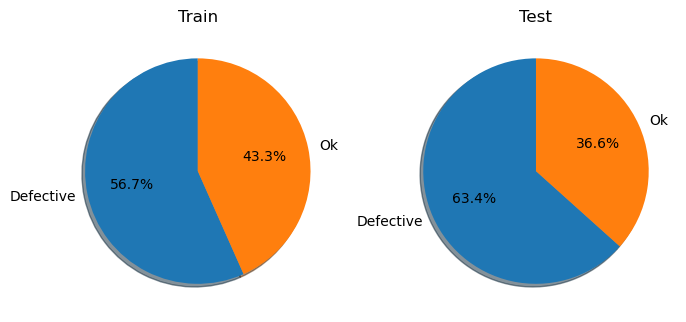

 Defective Training Images 	: 3758
 Ok Training Images 		: 2875

 Defective Testing Images 	: 453
 Ok Testing Images 		: 262


In [3]:
x_train = np.array([len(os.listdir(train_defective)),len(os.listdir(train_ok))])
x_test = np.array([len(os.listdir(test_defective)),len(os.listdir(test_ok))])
label = ['Defective','Ok']
  
fig, axes = plt.subplots(1, 2, figsize=(8,4))
axes[0].pie(x_train, labels=label, autopct='%1.1f%%',shadow=True, startangle=90)
axes[1].pie(x_test, labels=label, autopct='%1.1f%%',shadow=True, startangle=90)
axes[0].set_title('Train')
axes[1].set_title('Test')
plt.show()

print(' Defective Training Images \t: ' + str(len(os.listdir(train_defective))))
print(' Ok Training Images \t\t: ' + str(len(os.listdir(train_ok))))
print()
print(' Defective Testing Images \t: ' + str(len(os.listdir(test_defective))))
print(' Ok Testing Images \t\t: ' + str(len(os.listdir(test_ok))))

In [4]:
train_def = len(os.listdir(train_defective))
train_ok = len(os.listdir(train_ok))
test_def = len(os.listdir(test_defective))
test_ok = len(os.listdir(test_ok))
total_train = [train_def, train_ok]
total_test = [test_def, test_ok]
df = pd.DataFrame(data = [total_train, total_test], columns = ['Defective', 'Non-Defective'], index = ['Train_number','Test_number'])
df

,Defective,Non-Defective
Train_number,3758,2875
Test_number,453,262


<AxesSubplot:>

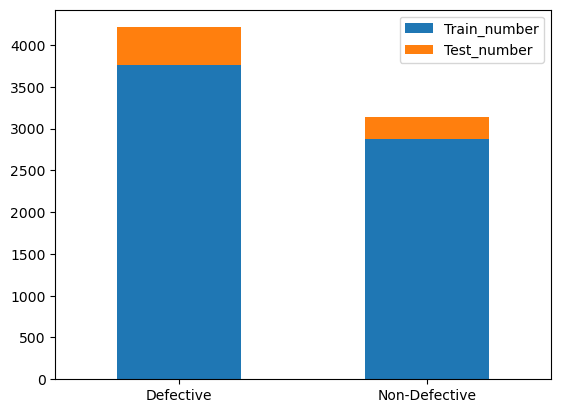

In [5]:
df.T.plot(kind = 'bar', stacked = 'True', rot = 0)


## Data loading and perprocessing

    - 0/1 Normalization 
    - Grayscale
    - input shape resize for CNN (300x300)
    
We normalize the pixel values in the range of 0 to 1. For this, we divide our pixel values by 255.

Resize our images to (300 x 300) , i.e. to grayscale mode.

Set the batch size to 64. Batch size is set because images are trained in batches. This improves the model while training.

Set the class mode to binary, as we only have 2 classes.

Set 30% of our training data as validation data.

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Using IDG to load images from directory
train_idg = ImageDataGenerator(rescale=1./255, validation_split=0.3) # 30 percent validation split for training 
test_idg = ImageDataGenerator(rescale=1./255)

# Specify parameters/arguments for data generation
img_size = (300, 300)
batch_size = 64

arg_train = {'target_size': img_size,
             'color_mode': 'grayscale',
             'class_mode': 'binary',
             'batch_size': batch_size}
arg_test = {'target_size': img_size,
            'color_mode': 'grayscale',
            'class_mode': 'binary',
            'batch_size': batch_size,
            'shuffle': False}

train = train_idg.flow_from_directory(directory='G:/Mtech - Sem 2/Deep Learning/Project/casting_data/train/', subset='training', **arg_train)
valid = train_idg.flow_from_directory(directory='G:/Mtech - Sem 2/Deep Learning/Project/casting_data/train/', subset='validation', **arg_train)
test  = test_idg.flow_from_directory(directory='G:/Mtech - Sem 2/Deep Learning/Project/casting_data/test/', **arg_test)

Found 4644 images belonging to 2 classes.
Found 1989 images belonging to 2 classes.
Found 715 images belonging to 2 classes.


## MLP

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Flatten
from tensorflow.keras.callbacks import ModelCheckpoint


### Bulding model

In [8]:
model = Sequential()
model.add(Flatten(input_shape=(img_size[0], img_size[1], 1)))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 90000)             0         
                                                                 
 dense (Dense)               (None, 256)               23040256  
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 23,073,281
Trainable params: 23,073,281
No

In [9]:
# Set up the ModelCheckpoint callback to save the best model during training
checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, save_weights_only=False, monitor='val_accuracy', mode='max', verbose=1)

### Training

In [10]:
history = model.fit(
    train ,
    validation_data=valid,
    epochs=20)

Epoch 1/20
73/73 [==============================] - 100s 1s/step - loss: 5.8851 - accuracy: 0.5506 - val_loss: 0.6908 - val_accuracy: 0.5666
Epoch 2/20
73/73 [==============================] - 51s 700ms/step - loss: 0.7084 - accuracy: 0.5659 - val_loss: 0.6871 - val_accuracy: 0.5666
Epoch 3/20
73/73 [==============================] - 47s 646ms/step - loss: 0.7137 - accuracy: 0.5652 - val_loss: 0.6856 - val_accuracy: 0.5666
Epoch 4/20
73/73 [==============================] - 54s 736ms/step - loss: 0.6856 - accuracy: 0.5665 - val_loss: 0.6849 - val_accuracy: 0.5666
Epoch 5/20
73/73 [==============================] - 52s 713ms/step - loss: 0.7099 - accuracy: 0.5663 - val_loss: 0.6845 - val_accuracy: 0.5666
Epoch 6/20
73/73 [==============================] - 52s 712ms/step - loss: 0.6849 - accuracy: 0.5665 - val_loss: 0.6843 - val_accuracy: 0.5666
Epoch 7/20
73/73 [==============================] - 47s 638ms/step - loss: 0.6842 - accuracy: 0.5665 - val_loss: 0.6843 - val_accuracy: 0.5666
E

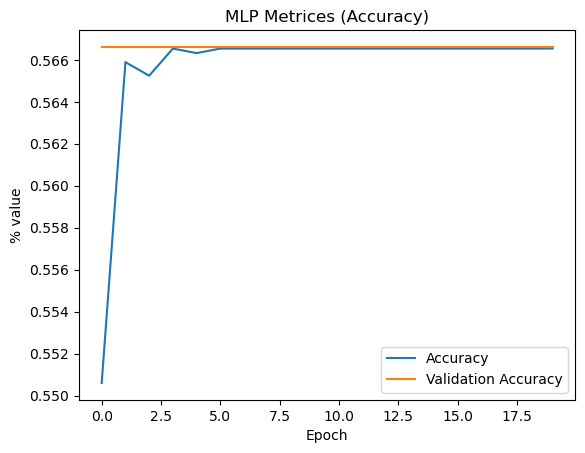

In [11]:
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('MLP Metrices (Accuracy)')
plt.ylabel('% value')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.show()

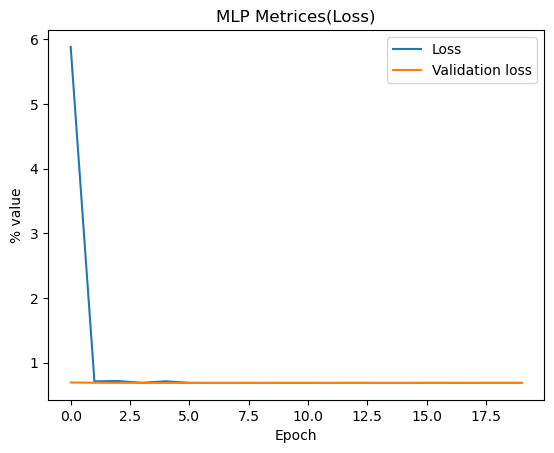

In [12]:
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('MLP Metrices(Loss)')
plt.ylabel('% value')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()

### Testing and evaluation

In [17]:
# Evaluate the model on the testing data
loss, accuracy = model.evaluate(test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)
y_pred = model.predict(test)
y_pred = (y_pred >= 0.5).reshape(-1,)

12/12 [==============================] - 3s 215ms/step - loss: 0.6668 - accuracy: 0.6336
Test Loss: 0.6668118834495544
Test Accuracy: 0.6335664391517639
12/12 [==============================] - 3s 216ms/step


In [18]:
y_actual = test.classes[test.index_array]

#### Confusion matrix

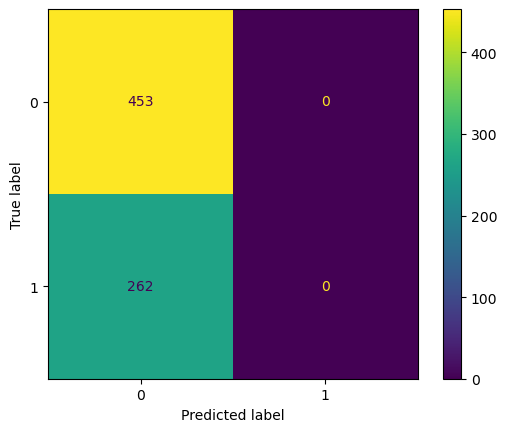

In [19]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_actual, y_pred)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

#### Classification report

In [20]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_actual, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.6336    1.0000    0.7757       453
           1     0.0000    0.0000    0.0000       262

    accuracy                         0.6336       715
   macro avg     0.3168    0.5000    0.3878       715
weighted avg     0.4014    0.6336    0.4914       715

